In [1]:
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
def read_evaluation_file(file_path):
    recall_levels = []
    precision_values = []
    k_levels = []
    precision_values_k = []
    map = 0
    
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('iprec_at_recall_'):
                parts = line.split()
                recall_level = float(parts[0].split('_')[-1])
                precision_value = float(parts[2])
                recall_levels.append(recall_level)
                precision_values.append(precision_value)
            if line.startswith('P_'):
                parts = line.split()
                k_level = int(parts[0].split('_')[-1])
                precision_value_k = float(parts[2])
                k_levels.append(k_level)
                precision_values_k.append(precision_value_k)
            if line.startswith('map'):
                parts = line.split()
                map = float(parts[2])
                
    return recall_levels, precision_values, k_levels, precision_values_k, map

def plot_2line(title, columns1, rows1, columns2, rows2, label1='Simple', label2='Boosted', x_axis='Recall', y_axis='Precision'):
    plt.figure(figsize=(10, 6))
    plt.plot(columns1, rows1, marker='o', linestyle='-', color='b', label=label1)
    plt.plot(columns2, rows2, marker='x', linestyle='--', color='r', label=label2)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## Query 1

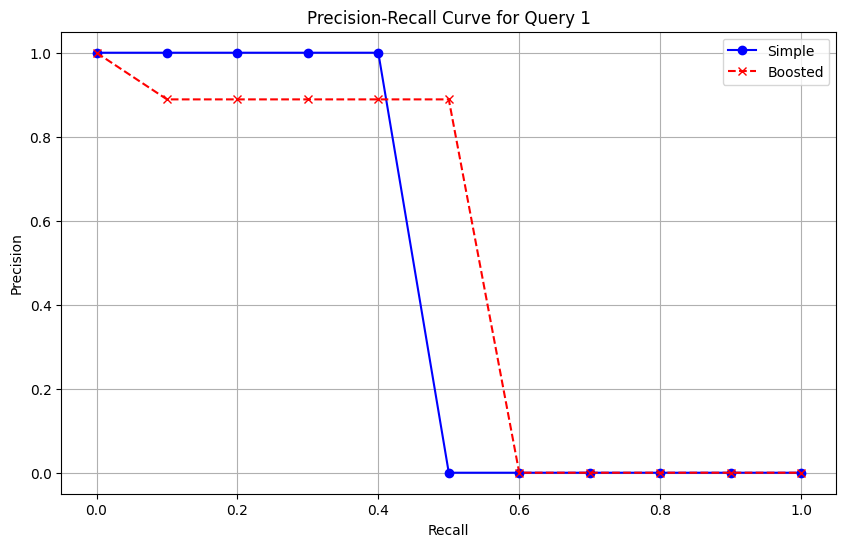

In [3]:
simple1 = []
boosted1 = []
simple1 = read_evaluation_file('../../evaluation_sys1_simple.txt')
boosted1 = read_evaluation_file('../../evaluation_sys1_boosted.txt')

plot_2line(f'Precision-Recall Curve for Query 1', simple1[0], simple1[1], boosted1[0], boosted1[1])

## Query 2

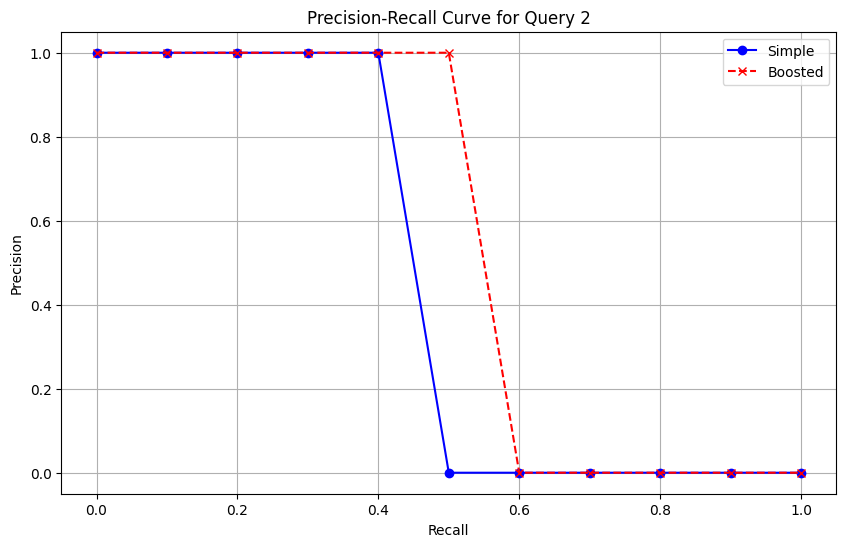

In [4]:
simple2 = []
boosted2 = []
simple2 = read_evaluation_file('../../evaluation_sys2_simple.txt')
boosted2 = read_evaluation_file('../../evaluation_sys2_boosted.txt')

plot_2line(f'Precision-Recall Curve for Query 2', simple2[0], simple2[1], boosted2[0], boosted2[1])

## Query 3

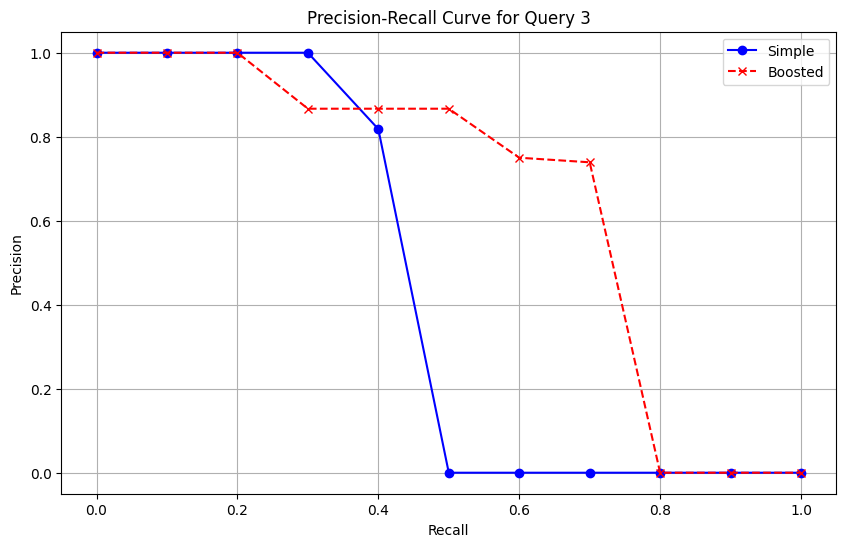

In [5]:
simple3 = []
boosted3 = []
simple3 = read_evaluation_file('../../evaluation_sys3_simple.txt')
boosted3 = read_evaluation_file('../../evaluation_sys3_boosted.txt')

plot_2line(f'Precision-Recall Curve for Query 3', simple3[0], simple3[1], boosted3[0], boosted3[1])

## Query 1 vs Query 2

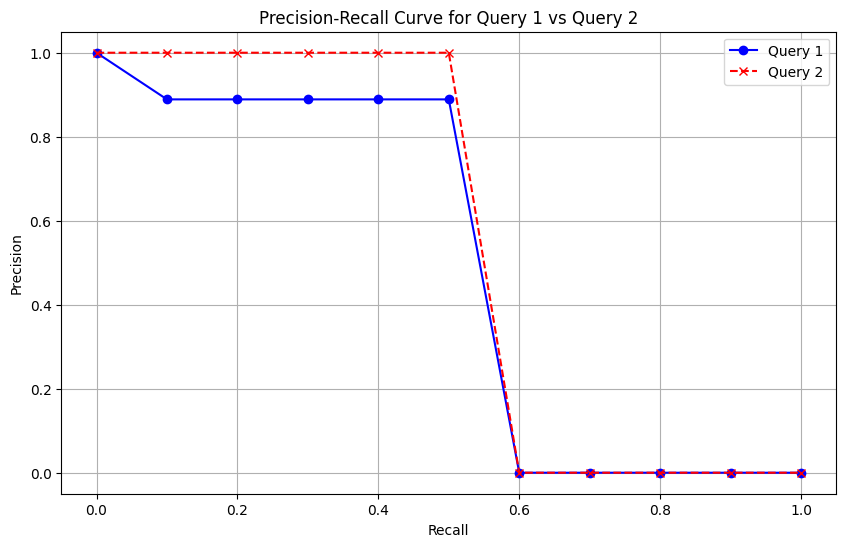

In [6]:
plot_2line('Precision-Recall Curve for Query 1 vs Query 2', boosted1[0], boosted1[1], boosted2[0], boosted2[1], 'Query 1', 'Query 2')

# Precision at K

## Query 1 

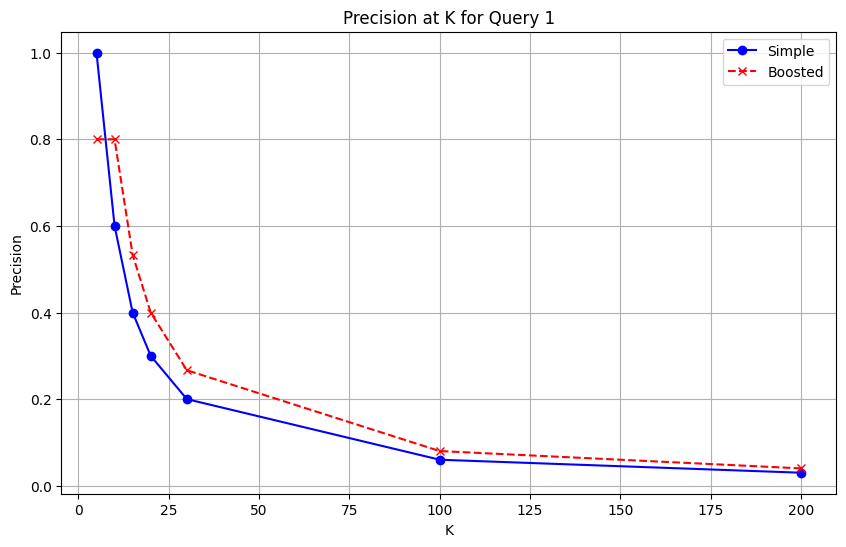

In [7]:
plot_2line('Precision at K for Query 1', simple1[2][:7], simple1[3][:7], boosted1[2][:7], boosted1[3][:7], 'Simple', 'Boosted', 'K', 'Precision')

## Query 2

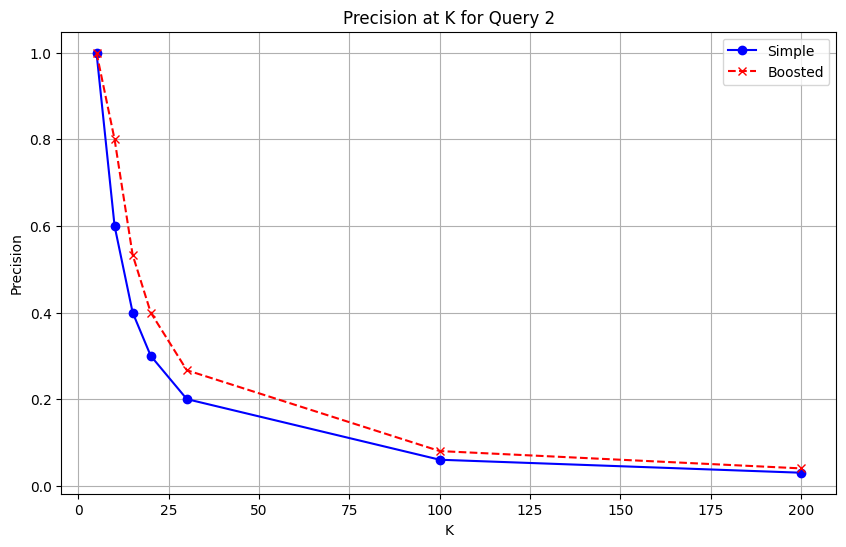

In [8]:
plot_2line('Precision at K for Query 2', simple2[2][:7], simple2[3][:7], boosted2[2][:7], boosted2[3][:7], x_axis='K')

## Query 3

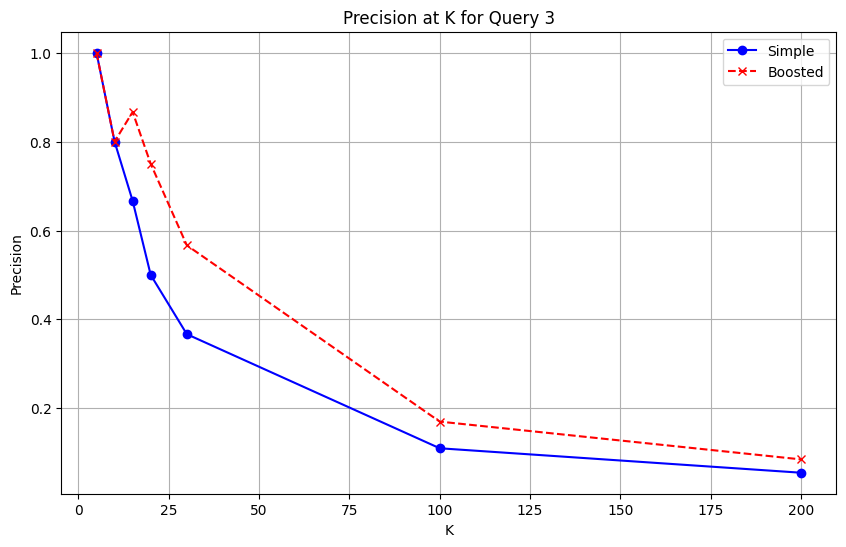

In [9]:
plot_2line('Precision at K for Query 3', simple3[2][:7], simple3[3][:7], boosted3[2][:7], boosted3[3][:7], x_axis='K')

## All 3 Queries

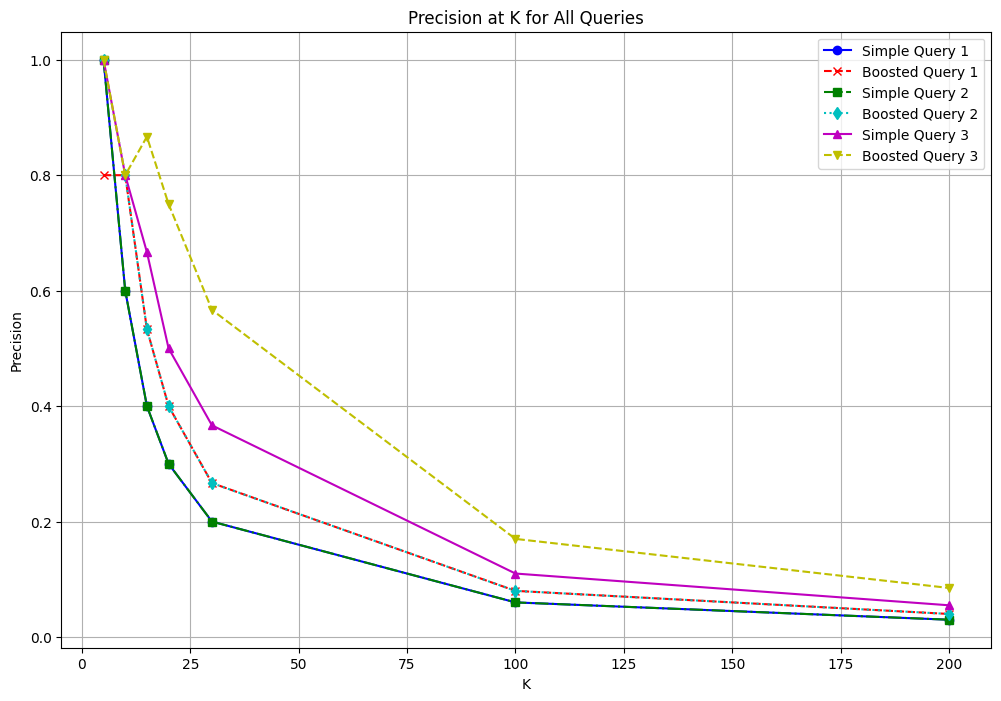

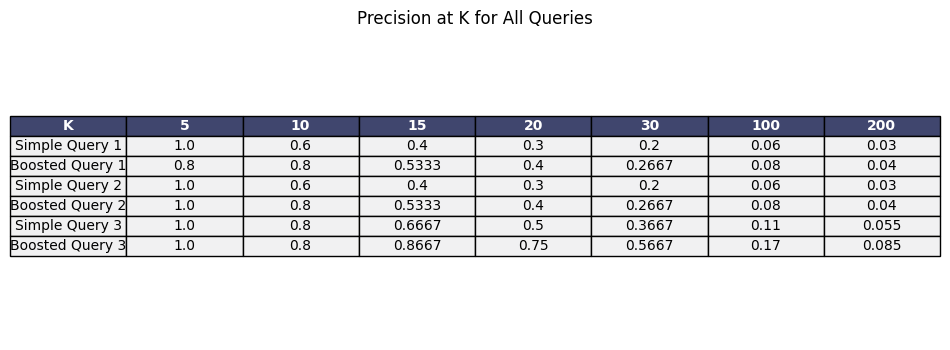

[['K', 5, 10, 15, 20, 30, 100, 200], ['Simple Query 1', 1.0, 0.6, 0.4, 0.3, 0.2, 0.06, 0.03], ['Boosted Query 1', 0.8, 0.8, 0.5333, 0.4, 0.2667, 0.08, 0.04], ['Simple Query 2', 1.0, 0.6, 0.4, 0.3, 0.2, 0.06, 0.03], ['Boosted Query 2', 1.0, 0.8, 0.5333, 0.4, 0.2667, 0.08, 0.04], ['Simple Query 3', 1.0, 0.8, 0.6667, 0.5, 0.3667, 0.11, 0.055], ['Boosted Query 3', 1.0, 0.8, 0.8667, 0.75, 0.5667, 0.17, 0.085]]


In [10]:
import csv

def plot_6line(title, columns1, rows1, columns2, rows2, columns3, rows3, columns4, rows4, columns5, rows5, columns6, rows6, label1='Curve 1', label2='Curve 2', label3='Curve 3', label4='Curve 4', label5='Curve 5', label6='Curve 6', x_axis='X', y_axis='Y'):
    plt.figure(figsize=(12, 8))
    plt.plot(columns1[:7], rows1[:7], marker='o', linestyle='-', color='b', label=label1)
    plt.plot(columns2[:7], rows2[:7], marker='x', linestyle='--', color='r', label=label2)
    plt.plot(columns3[:7], rows3[:7], marker='s', linestyle='-.', color='g', label=label3)
    plt.plot(columns4[:7], rows4[:7], marker='d', linestyle=':', color='c', label=label4)
    plt.plot(columns5[:7], rows5[:7], marker='^', linestyle='-', color='m', label=label5)
    plt.plot(columns6[:7], rows6[:7], marker='v', linestyle='--', color='y', label=label6)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_6line('Precision at K for All Queries', 
               simple1[2], simple1[3], 
               boosted1[2], boosted1[3], 
               simple2[2], simple2[3], 
               boosted2[2], boosted2[3], 
               simple3[2], simple3[3], 
               boosted3[2], boosted3[3], 
               'Simple Query 1', 'Boosted Query 1', 
               'Simple Query 2', 'Boosted Query 2', 
               'Simple Query 3', 'Boosted Query 3', 
               'K', 'Precision')

# Prepare the data for CSV
csv_data = [
    ['K'] + simple1[2][:7],
    ['Simple Query 1'] + simple1[3][:7],
    ['Boosted Query 1'] + boosted1[3][:7],
    ['Simple Query 2'] + simple2[3][:7],
    ['Boosted Query 2'] + boosted2[3][:7],
    ['Simple Query 3'] + simple3[3][:7],
    ['Boosted Query 3'] + boosted3[3][:7]
]
# Create a DataFrame for the CSV data
df_csv = pd.DataFrame(csv_data[1:], columns=csv_data[0])

# Plot the table
fig, ax = plt.subplots(figsize=(10, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_csv.values, colLabels=df_csv.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Set table header style
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f1f1f2')

plt.title('Precision at K for All Queries')
plt.show()

print(csv_data)


# Mean Average Precision

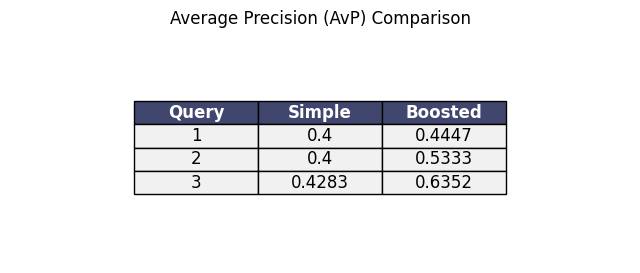

In [11]:
# Calculate MAP values
map_values = {
    'Query': ['1', '2', '3'],
    'Simple': [simple1[4], simple2[4], simple3[4]],
    'Boosted': [boosted1[4], boosted2[4], boosted3[4]]
}

# Create a DataFrame
df_map = pd.DataFrame(map_values)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_map.values, colLabels=df_map.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.6, 1.4) 

# Set table header style
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f1f1f2')

plt.title('Average Precision (AvP) Comparison')
plt.show()

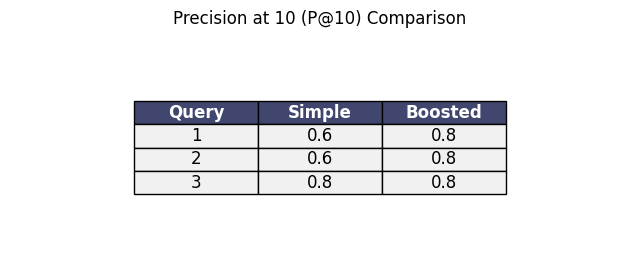

In [12]:
# Calculate MAP values
map_values = {
    'Query': ['1', '2', '3'],
    'Simple': [simple1[3][1], simple2[3][1], simple3[3][1]],
    'Boosted': [boosted1[3][1], boosted2[3][1], boosted3[3][1]]
}

# Create a DataFrame
df_map = pd.DataFrame(map_values)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_map.values, colLabels=df_map.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.6, 1.4) 

# Set table header style
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f1f1f2')

plt.title('Precision at 10 (P@10) Comparison')
plt.show()

## NEW BOOSTED MEGA BLASTER ULTRA SCHEMA